In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
class State:
    def __init__(self, name: str, population: int, homicides: int) -> None:
        self.name = name
        self.population = population
        self.homicide = homicides
        self.hom_per_pop = homicides * 1000 / population
        
    def __repr__(self) -> str:
        return f'{self.name}, population: {self.population}, homicides: {self.homicide}, h/p: {self.hom_per_pop:.6f}'
        
    def __str__(self) -> str:
        return f'{self.name}, population: {self.population}, homicides: {self.homicide}, h/p: {self.hom_per_pop}'

In [19]:
population_data = pd.read_excel("pop.xlsx")
gun_violence_data = pd.read_excel("gun_violence_data_2013_2018.xlsx")

print('Population per state \n', population_data.head())
print('Homicides per state \n', gun_violence_data.head())

Population per state 
           state  population
0    California    39237836
1         Texas    29527941
2       Florida    21781128
3      New York    19835913
4  Pennsylvania    12964056
Homicides per state 
             state  n_killed
0    Pennsylvania         0
1      California         1
2            Ohio         1
3        Colorado         4
4  North Carolina         2


In [20]:
def sum_column(excel: pd.DataFrame, state: str, column_name: str):
    filt = (excel['state'] == state) & (excel[column_name] != 0)
    return excel.loc[filt, column_name].sum()

In [21]:
states = []
for state in gun_violence_data.state.unique():
    population = sum_column(excel = population_data, state = state, column_name = 'population')
    homicides = sum_column(excel = gun_violence_data, state = state, column_name = 'n_killed')
    states.append(State(state, population, homicides))
states[:5]

[Pennsylvania, population: 12964056, homicides: 2395, h/p: 0.184742,
 California, population: 39237836, homicides: 5562, h/p: 0.141751,
 Ohio, population: 11780017, homicides: 2508, h/p: 0.212903,
 Colorado, population: 5812069, homicides: 796, h/p: 0.136956,
 North Carolina, population: 10551162, homicides: 2225, h/p: 0.210877]

1) State with the most murders is California with 5562 homicides. 
However California is not the most dangerous state because number of homicides per 1000 residents is only 0.1418 while in District of Columbia it is 0.6850. 

In [22]:
states.sort(key=lambda x: x.hom_per_pop, reverse=True)
hom_per_pop_numbers = []
hom_per_pop_names = []
for state in states:
    hom_per_pop_names.append(state.name)
    hom_per_pop_numbers.append(state.hom_per_pop)


Plot with murders per 1000 residents

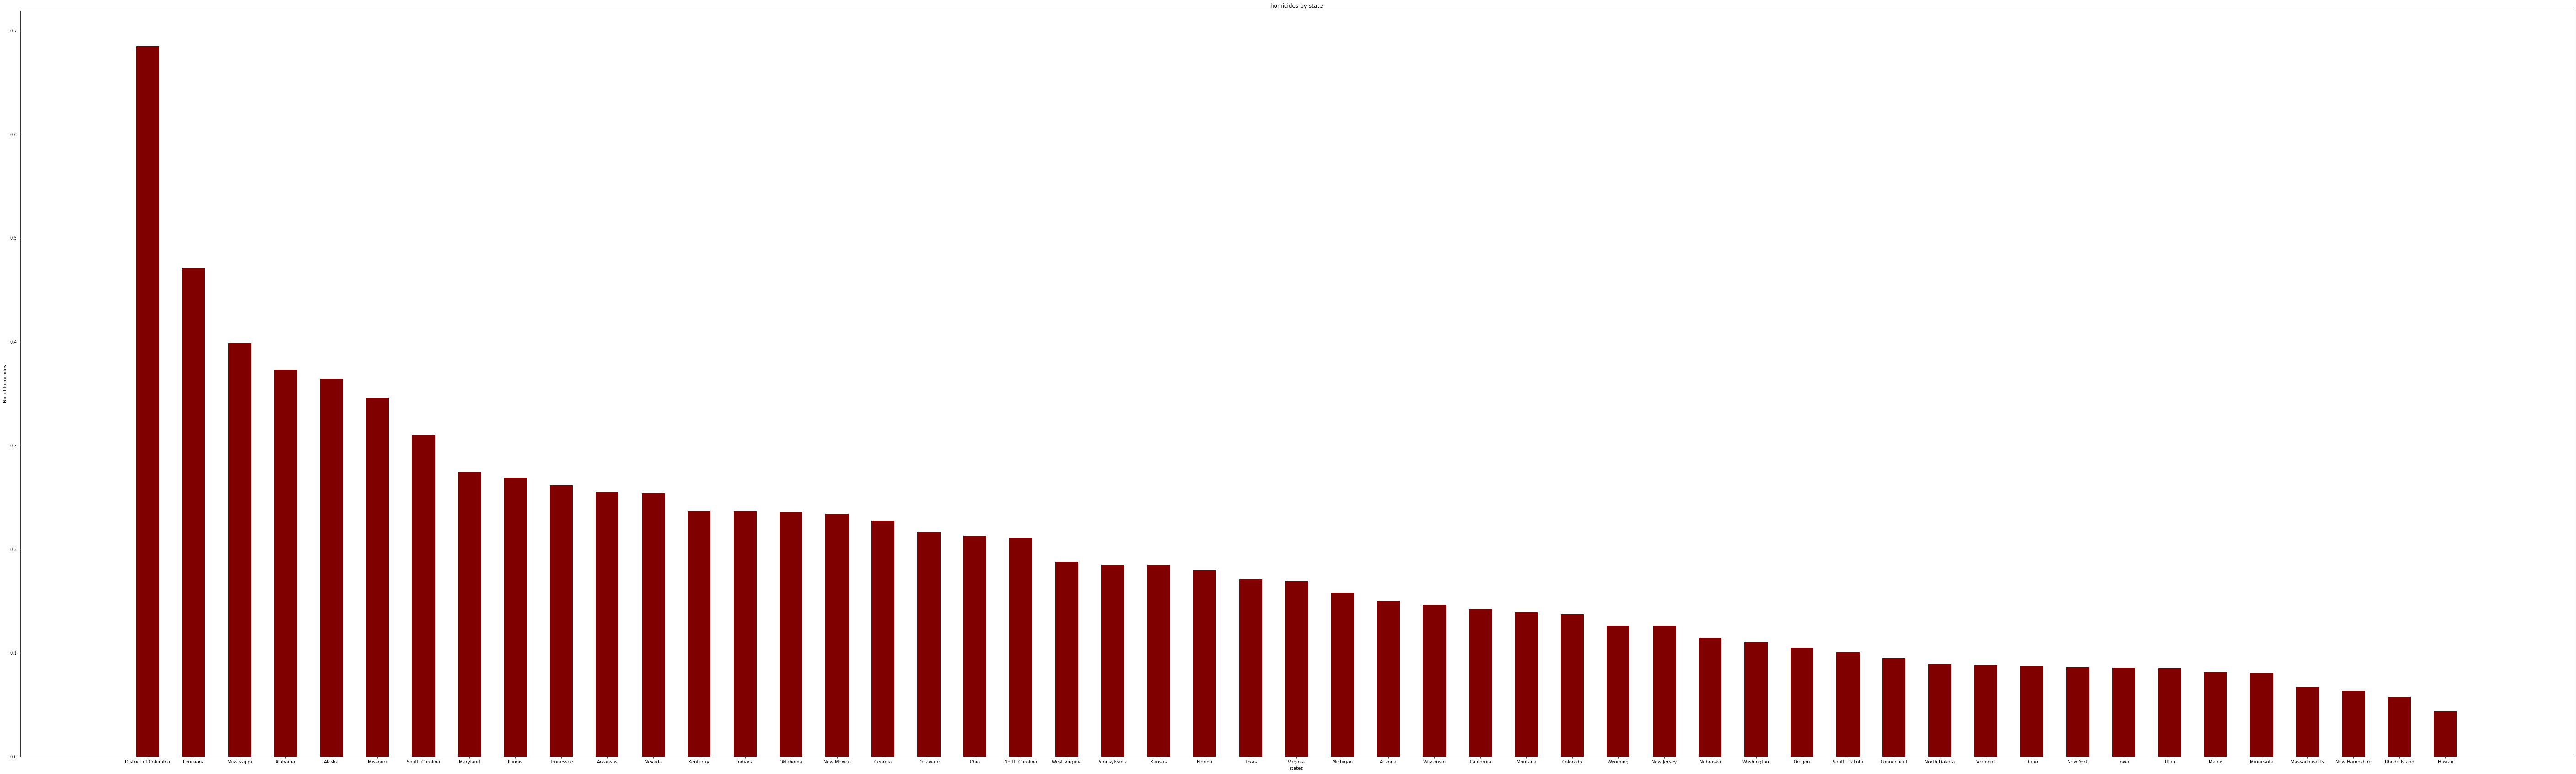

In [23]:
fig = plt.figure(figsize = (100, 30))  
plt.bar(hom_per_pop_names,  hom_per_pop_numbers, color ='maroon',
        width = 0.5)
plt.xlabel("states")
plt.ylabel("No. of homicides")
plt.title("homicides by state")
plt.show()

In [24]:
states.sort(key=lambda x: x.homicide, reverse=True)
hom_numbers = []
hom_names = []
for state in states:
    hom_names.append(state.name)
    hom_numbers.append(state.homicide)


Plot with total number of murders

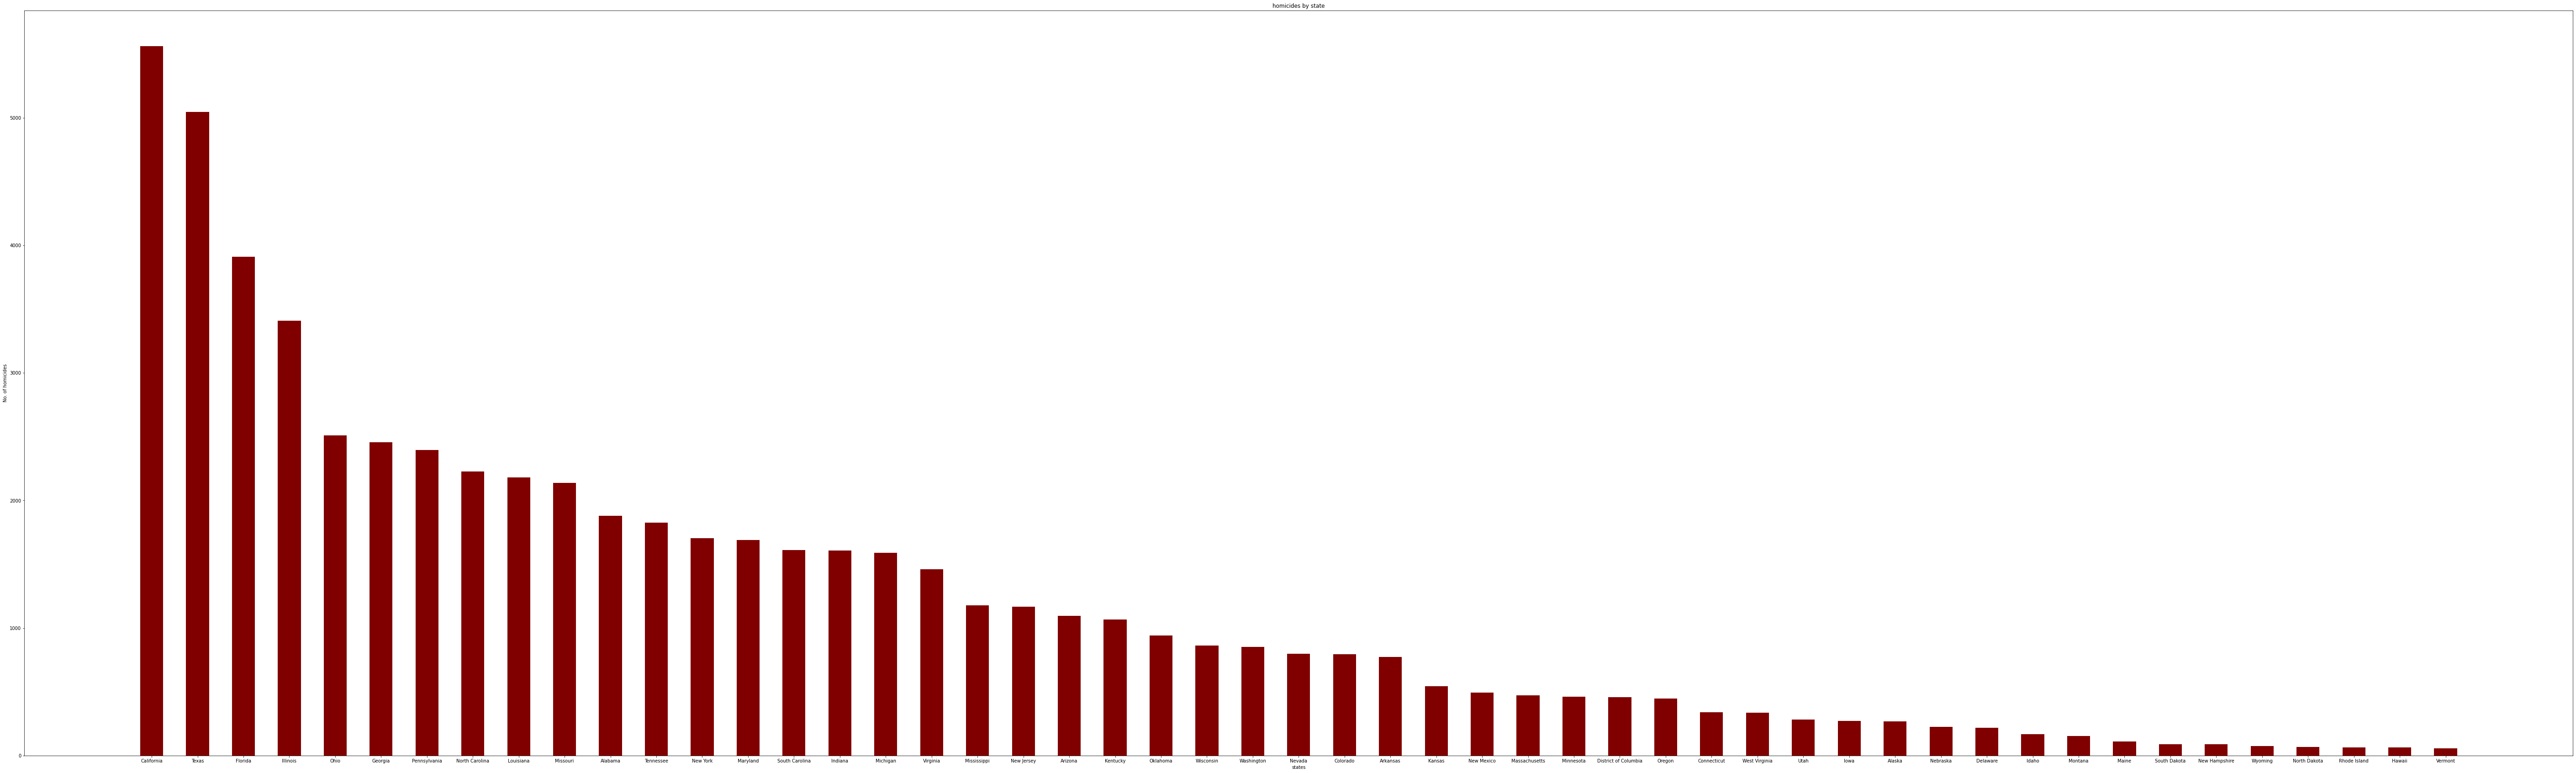

In [25]:
fig = plt.figure(figsize = (100, 30))  
plt.bar(hom_names,  hom_numbers, color ='maroon',
        width = 0.5)
plt.xlabel("states")
plt.ylabel("No. of homicides")
plt.title("homicides by state")
plt.show()


In [26]:
states_codes = {'Alaska': 'AK', 'Alabama': 'AL', 'Arkansas': 'AR', 'Arizona': 'AZ',
                'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'District of Columbia': 'DC',
                'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Iowa': 'IA',
                'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Kansas': 'KS', 'Kentucky': 'KY',
                'Louisiana': 'LA', 'Massachusetts': 'MA', 'Maryland': 'MD', 'Maine': 'ME', 'Michigan': 'MI',
                'Minnesota': 'MN', 'Missouri': 'MO', 'Mississippi': 'MS', 'Montana': 'MT',
                'North Carolina': 'NC', 'North Dakota': 'ND', 'Nebraska': 'NE', 'New Hampshire': 'NH',
                'New Jersey': 'NJ', 'New Mexico': 'NM', 'Nevada': 'NV', 'New York': 'NY', 'Ohio': 'OH',
                'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
                'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
                'Utah': 'UT', 'Virginia': 'VA', 'Vermont': 'VT', 'Washington': 'WA', 'Wisconsin': 'WI',
                'West Virginia': 'WV', 'Wyoming': 'WY'}


Map showing murder rate (homicides per 1000 residents) in each state: 

In [40]:
list_of_codes_h_p_p = []
for state in hom_per_pop_names:
    list_of_codes_h_p_p.append(states_codes[state])

fig = px.choropleth(locations=list_of_codes_h_p_p, locationmode="USA-states", color=hom_per_pop_numbers, scope="usa")
fig.show()

In [41]:
# Without DC
states.sort(key=lambda x: x.hom_per_pop, reverse=True)
hom_per_pop_numbers_without_DC = []
hom_per_pop_names_without_DC = []
for state in states:
    if state.name != 'District of Columbia':
        hom_per_pop_names_without_DC.append(state.name)
        hom_per_pop_numbers_without_DC.append(state.hom_per_pop)


Map showing murder rate (homicides per 1000 residents) in each state without District of Columbia: 

In [42]:
list_of_codes_h_p_p = []
for state in hom_per_pop_names_without_DC:
    list_of_codes_h_p_p.append(states_codes[state])

fig = px.choropleth(locations=list_of_codes_h_p_p, locationmode="USA-states", color=hom_per_pop_numbers_without_DC, scope="usa")
fig.show()

In [43]:
sorted(states, key=lambda x: x.hom_per_pop, reverse=True)[:5]

[District of Columbia, population: 670050, homicides: 459, h/p: 0.685024,
 Louisiana, population: 4624047, homicides: 2179, h/p: 0.471232,
 Mississippi, population: 2949965, homicides: 1176, h/p: 0.398649,
 Alabama, population: 5039877, homicides: 1880, h/p: 0.373025,
 Alaska, population: 732673, homicides: 267, h/p: 0.364419]

In [44]:
state_names = []
state_population = []
state_murders_total = []
state_murder_rate = []
for state in states:
    state_names.append(state.name)
    state_population.append(state.population)
    state_murders_total.append(state.homicide)
    state_murder_rate.append(state.hom_per_pop)

In [45]:
df = pd.DataFrame({'State': state_names,
                   'population': state_population,
                   'murders total': state_murders_total,
                   'murder rate': state_murder_rate})
writer = pd.ExcelWriter('final.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.close()
print(df)

                   State  population  murders total  murder rate
0   District of Columbia      670050            459     0.685024
1              Louisiana     4624047           2179     0.471232
2            Mississippi     2949965           1176     0.398649
3                Alabama     5039877           1880     0.373025
4                 Alaska      732673            267     0.364419
5               Missouri     6168187           2136     0.346293
6         South Carolina     5190705           1610     0.310170
7               Maryland     6165129           1691     0.274285
8               Illinois    12671469           3409     0.269030
9              Tennessee     6975218           1824     0.261497
10              Arkansas     3025891            773     0.255462
11                Nevada     3143991            799     0.254136
12              Kentucky     4509394           1066     0.236395
13               Indiana     6805985           1608     0.236263
14              Oklahoma 

It is clear that the murder rate is higher in the South and especially in the East South. We recommend living in the northern part of the United States. 